# Connectome manipulator benchmarks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [121]:
def load_benchmarks(benchmark_list):
    """
    Loads a list of benchmarks into a Pandas DataFrame
    """
    benchmark_table = pd.DataFrame([], columns=['circuit', 'neurons', 'synapses', 'splits', 'name', 't_OP', 't_IO', 'mem'])
    for bm_dict in benchmark_list:
        df = pd.read_csv(bm_dict['csv'])
        t_manip = df[df['label'] == 'manipulated']['t_dur'].sum()
        t_io = df[df['label'] == 'final']['t_tot'].sum() - t_manip
        mem = df[df['label'] == 'final']['mem_curr'].sum()
        bm_dict.update({'t_OP': t_manip, 't_IO': t_io, 'mem': mem})
        benchmark_table = benchmark_table.append(bm_dict, ignore_index=True)

    return benchmark_table


def plot_benchmarks(benchmark_table, fig_title, x_column, x_label):
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 2, 1)
    plt.plot(benchmark_table[x_column], benchmark_table['t_OP'], '.-', label='Operation')
    plt.plot(benchmark_table[x_column], benchmark_table['t_IO'], '.-', label='I/O')
    plt.plot(benchmark_table[x_column], benchmark_table['t_OP'] + benchmark_table['t_IO'], '.-', label='Total')
    plt.ylim((0, max(plt.ylim())))
    plt.grid()
    plt.xlabel(x_label)
    plt.ylabel('Time (s)')
    plt.legend(ncol=3)
    plt.title('Time consumption')

    plt.subplot(1, 2, 2)
    plt.plot(benchmark_table[x_column], benchmark_table['mem'], '.-r', label='Memory')
    plt.ylim((0, 1.1 * max(plt.ylim())))
    plt.grid()
    plt.xlabel(x_label)
    plt.ylabel('Memory (GB)')
    plt.title('Memory consumption')

    plt.suptitle(fig_title)
    plt.tight_layout()

In [109]:
# No manipulation
benchmark_list = [{'circuit': 'O1v5-SONATA', 'neurons': 219422, 'synapses': 356915309, 'splits': 1, 'name': 'NoManip', 'synapses_OP': 0, 'csv': '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/O1v5-SONATA_manip__BENCHMARK__/logs/connectome_manipulation.20211104T114211.csv'}]
benchmark_table = load_benchmarks(benchmark_list)
print(benchmark_table[['t_OP', 't_IO', 'mem']])

       t_OP        t_IO         mem
0  0.886028  590.065551  119.352543


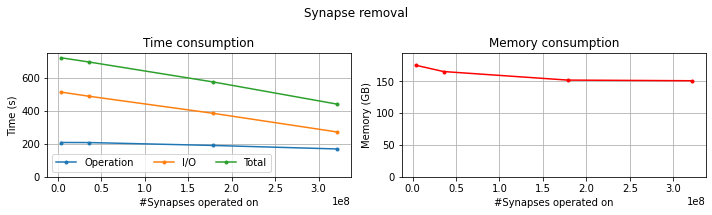

In [122]:
# Synapse removal
benchmark_list = [{'circuit': 'O1v5-SONATA', 'neurons': 219422, 'synapses': 356915309, 'splits': 1, 'name': 'Remove1pctAllSyn', 'synapses_OP': 3569153, 'csv': '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/O1v5-SONATA_manip__BENCHMARK__/logs/connectome_manipulation.20211104T115714.csv'},
                  {'circuit': 'O1v5-SONATA', 'neurons': 219422, 'synapses': 356915309, 'splits': 1, 'name': 'Remove10pctAllSyn', 'synapses_OP': 35691531, 'csv': '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/O1v5-SONATA_manip__BENCHMARK__/logs/connectome_manipulation.20211104T121429.csv'},
                  {'circuit': 'O1v5-SONATA', 'neurons': 219422, 'synapses': 356915309, 'splits': 1, 'name': 'Remove50pctAllSyn', 'synapses_OP': 178457654, 'csv': '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/O1v5-SONATA_manip__BENCHMARK__/logs/connectome_manipulation.20211104T122734.csv'},
                  {'circuit': 'O1v5-SONATA', 'neurons': 219422, 'synapses': 356915309, 'splits': 1, 'name': 'Remove90pctAllSyn', 'synapses_OP': 321223778, 'csv': '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/O1v5-SONATA_manip__BENCHMARK__/logs/connectome_manipulation.20211104T124230.csv'}]
benchmark_table = load_benchmarks(benchmark_list)
plot_benchmarks(benchmark_table, 'Synapse removal', 'synapses_OP', '#Synapses operated on')
# benchmark_table['synapses_OP_pct'] = 100.0 * benchmark_table['synapses_OP'] / benchmark_table['synapses']
# plot_benchmarks(benchmark_table, 'Synapse removal', 'synapses_OP_pct', 'Percentage of synapses operated on')

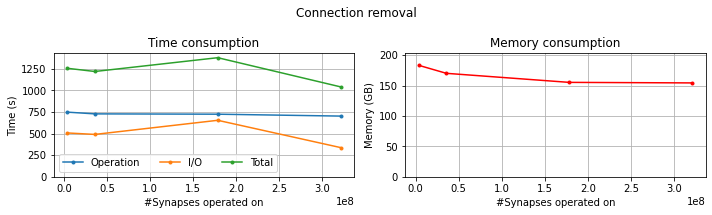

In [123]:
# Connection removal
benchmark_list = [{'circuit': 'O1v5-SONATA', 'neurons': 219422, 'synapses': 356915309, 'splits': 1, 'name': 'Remove1pctAllConn', 'synapses_OP': 3568892, 'csv': '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/O1v5-SONATA_manip__BENCHMARK__/logs/connectome_manipulation.20211104T131810.csv'},
                  {'circuit': 'O1v5-SONATA', 'neurons': 219422, 'synapses': 356915309, 'splits': 1, 'name': 'Remove10pctAllConn', 'synapses_OP': 35690005, 'csv': '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/O1v5-SONATA_manip__BENCHMARK__/logs/connectome_manipulation.20211104T134050.csv'},
                  {'circuit': 'O1v5-SONATA', 'neurons': 219422, 'synapses': 356915309, 'splits': 1, 'name': 'Remove50pctAllConn', 'synapses_OP': 178467250, 'csv': '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/O1v5-SONATA_manip__BENCHMARK__/logs/connectome_manipulation.20211104T164827.csv'},
                  {'circuit': 'O1v5-SONATA', 'neurons': 219422, 'synapses': 356915309, 'splits': 1, 'name': 'Remove90pctAllConn', 'synapses_OP': 321226789, 'csv': '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/O1v5-SONATA_manip__BENCHMARK__/logs/connectome_manipulation.20211104T172533.csv'}]
benchmark_table = load_benchmarks(benchmark_list)
plot_benchmarks(benchmark_table, 'Connection removal', 'synapses_OP', '#Synapses operated on')

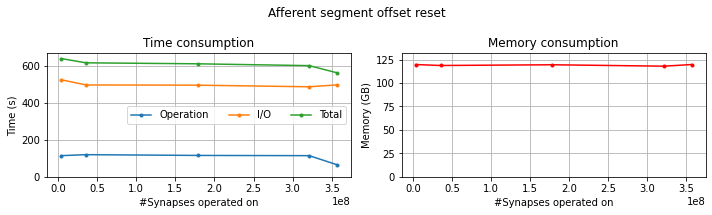

In [124]:
# Afferent segment offset reset
benchmark_list = [{'circuit': 'O1v5-SONATA', 'neurons': 219422, 'synapses': 356915309, 'splits': 1, 'name': 'Reset1pctAffSegOff', 'synapses_OP': 3569153, 'csv': '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/O1v5-SONATA_manip__BENCHMARK__/logs/connectome_manipulation.20211105T115953.csv'},
                  {'circuit': 'O1v5-SONATA', 'neurons': 219422, 'synapses': 356915309, 'splits': 1, 'name': 'Reset10pctAffSegOff', 'synapses_OP': 35691531, 'csv': '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/O1v5-SONATA_manip__BENCHMARK__/logs/connectome_manipulation.20211105T121514.csv'},
                  {'circuit': 'O1v5-SONATA', 'neurons': 219422, 'synapses': 356915309, 'splits': 1, 'name': 'Reset50pctAffSegOff', 'synapses_OP': 178457654, 'csv': '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/O1v5-SONATA_manip__BENCHMARK__/logs/connectome_manipulation.20211105T123750.csv'},
                  {'circuit': 'O1v5-SONATA', 'neurons': 219422, 'synapses': 356915309, 'splits': 1, 'name': 'Reset90pctAffSegOff', 'synapses_OP': 321223778, 'csv': '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/O1v5-SONATA_manip__BENCHMARK__/logs/connectome_manipulation.20211105T133543.csv'},
                  {'circuit': 'O1v5-SONATA', 'neurons': 219422, 'synapses': 356915309, 'splits': 1, 'name': 'Reset100pctAffSegOff', 'synapses_OP': 356915309, 'csv': '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/O1v5-SONATA_manip__BENCHMARK__/logs/connectome_manipulation.20211105T134643.csv'}]
benchmark_table = load_benchmarks(benchmark_list)
plot_benchmarks(benchmark_table, 'Afferent segment offset reset', 'synapses_OP', '#Synapses operated on')

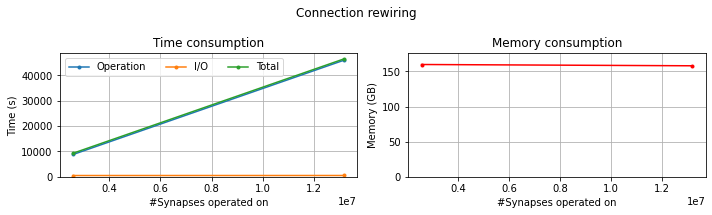

In [125]:
# Connection rewiring
benchmark_list = [{'circuit': 'O1v5-SONATA', 'neurons': 219422, 'synapses': 356915309, 'splits': 1, 'name': 'ConnRewire1pctExcOrd1KeepIndeg', 'synapses_OP': 2580368, 'csv': '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/O1v5-SONATA_manip__BENCHMARK__/logs/connectome_manipulation.20211105T145437.csv'},
                  {'circuit': 'O1v5-SONATA', 'neurons': 219422, 'synapses': 356915309, 'splits': 1, 'name': 'ConnRewire5pctExcOrd1KeepIndeg', 'synapses_OP': 13172620, 'csv': '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/O1v5-SONATA_manip__BENCHMARK__/logs/connectome_manipulation.20211108T164201.csv'}]
#                   {'circuit': 'O1v5-SONATA', 'neurons': 219422, 'synapses': 356915309, 'splits': 1, 'name': 'ConnRewire7p5pctExcOrd1KeepIndeg', 'synapses_OP': xxx, 'csv': '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/O1v5-SONATA_manip__BENCHMARK__/logs/connectome_manipulation.20211109T125705.csv'}
benchmark_table = load_benchmarks(benchmark_list)
plot_benchmarks(benchmark_table, 'Connection rewiring', 'synapses_OP', '#Synapses operated on')

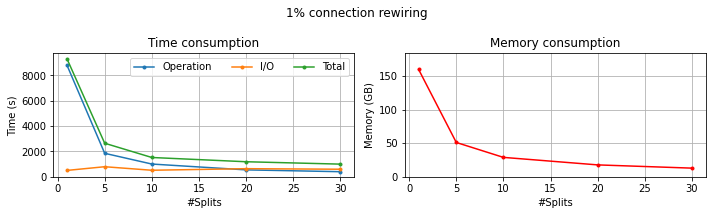

In [126]:
# Connection rewiring (different splits)
benchmark_list = [{'circuit': 'O1v5-SONATA', 'neurons': 219422, 'synapses': 356915309, 'splits': 1, 'name': 'ConnRewire1pctExcOrd1KeepIndeg', 'synapses_OP': 2580368, 'csv': '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/O1v5-SONATA_manip__BENCHMARK__/logs/connectome_manipulation.20211105T145437.csv'},
                  {'circuit': 'O1v5-SONATA', 'neurons': 219422, 'synapses': 356915309, 'splits': 5, 'name': 'ConnRewire1pctExcOrd1KeepIndeg_Split5', 'synapses_OP': 2633631, 'csv': '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/O1v5-SONATA_manip__BENCHMARK__/logs/connectome_manipulation.20211109T104055.csv'},
                  {'circuit': 'O1v5-SONATA', 'neurons': 219422, 'synapses': 356915309, 'splits': 10, 'name': 'ConnRewire1pctExcOrd1KeepIndeg_Split10', 'synapses_OP': np.nan, 'csv': '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/O1v5-SONATA_manip__BENCHMARK__/logs/connectome_manipulation.20211109T100156.csv'},
                  {'circuit': 'O1v5-SONATA', 'neurons': 219422, 'synapses': 356915309, 'splits': 20, 'name': 'ConnRewire1pctExcOrd1KeepIndeg_Split20', 'synapses_OP': np.nan, 'csv': '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/O1v5-SONATA_manip__BENCHMARK__/logs/connectome_manipulation.20211109T112627.csv'},
                  {'circuit': 'O1v5-SONATA', 'neurons': 219422, 'synapses': 356915309, 'splits': 30, 'name': 'ConnRewire1pctExcOrd1KeepIndeg_Split30', 'synapses_OP': np.nan, 'csv': '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/O1v5-SONATA_manip__BENCHMARK__/logs/connectome_manipulation.20211109T114755.csv'}]
benchmark_table = load_benchmarks(benchmark_list)
plot_benchmarks(benchmark_table, '1% connection rewiring', 'splits', '#Splits')